## Alloy optimization

We use multi-objective optimization to select the cheapest alloys exhibiting enhanced *X* property after mixing. 

In [1]:
import mosa
from numpy import random, arange, asarray

%matplotlib inline

In [2]:
print(f"MOSA version: {mosa.__version__}")

MOSA version: 0.7.0


In [3]:
random.seed(0)

The pure, fictitious elements have symbols in the **A**...**Z** range. The *X* property and the cost associated with the pure elements was generated by the *generate_data* function below.

In [4]:
def generate_data(component):
    k = arange(component.shape[0]) + 1

    x0 = 0.5
    x1 = 12.6
    x = x0 * k + x1 + random.uniform(0.0, 5.0, component.shape[0])

    cost = random.uniform(5.0, 500.0, component.shape[0])

    return x, cost

### Translating the alloy optimization problem into Python code

The function *fobj* below implements the problem. The two objectives to be minimized are the *X* property and the final cost of the proposed alloy.

The solution to the problem consists of two items. "Component" is a list, where the first element is the matrix element and the second is the alloying element. "Concentration" gives the relative amount of the alloying element in the alloy.

Notice that both *X* and cost of the alloy results from a simple mixing rule considering *X* and cost of the pure elements. 

Also, maximizing *X* is equivalent to minimizing -*X*, that is why -*x* is returned by *fobj*.

In [5]:
def fobj(Component: list, Concentration: float) -> tuple:
    first, second = Component
    
    x1 = float(X[component == first][0])
    cost1 = float(Cost[component == first][0])

    x2 = float(X[component == second][0])
    cost2 = float(Cost[component == second][0])

    x = x1 * (1.0 - Concentration) + x2 * Concentration
    cost = cost1 * (1.0 - Concentration) + cost2 * Concentration

    return -x, cost

In [6]:
component = asarray(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

In [7]:
X, Cost = generate_data(component)

### Initialization

In [8]:
opt = mosa.Anneal()

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
       Developed by Prof. Roberto Gomes, PhD      
   Universidade Federal do ABC (UFABC), Brazil
    


In [9]:
opt.set_population(Component = component.tolist(), Concentration = (0.0, 0.1))

In [10]:
opt.initial_temperature = 1.0
opt.number_of_temperatures = 100
opt.number_of_iterations = 200
opt.objective_weights = [(X.max() - X.min()), (Cost.max() - Cost.min())]
opt.archive_size = 1000
opt.maximum_archive_rejections = 1000

In [11]:
opt.set_opt_param("number_of_elements", Component = 2, Concentration = 1)
opt.set_opt_param("item_selection_weights", Component = 1.0, Concentration = 4.0)
opt.set_opt_param("distinct_elements", Component = True)
opt.set_opt_param("change_value_move", Component = 1.0, Concentration = 1.0)
opt.set_opt_param("swap_move", Component = 1.0)
opt.set_opt_param("mc_step_size", Concentration = 0.05)

In [12]:
opt.verbose = True

IMPORTANT: Restarting from previous runs is disabled.

In [13]:
opt.restart = False

### Run 1

In [14]:
%%time
random.seed(1)
opt.archive_file = "archive1.json"
opt.evolve(fobj)
archive1 = opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------

Items in the solution:

    Component:
        Number of elements: 2
        Sample space: discrete
        Size of population item: 26
        Distinct elements: True
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Weight of 'swap' trial move: 1.0
        Sort values: False
        Maximum step size: 13
    Concentration:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,0.1)
        Selection weight: 4.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.05
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 190.
    Fraction of accepted moves: 0.950000.
    Number of archive updates: 134.
    Fraction of archive updates in accepted moves: 0.705263.
------
TEMPERATURE: 0.900000
    Number of accepted mo

### Output 1

In [15]:
opt.printx()

===
Solutions:
1) {'Component': ['I', 'R'], 'Concentration': 0.0766582658338888}
2) {'Component': ['I', 'R'], 'Concentration': 0.06048546667601177}
3) {'Component': ['I', 'R'], 'Concentration': 0.027026223988424303}
4) {'Component': ['I', 'R'], 'Concentration': 0.06727151725550516}
5) {'Component': ['R', 'I'], 'Concentration': 0.06727151725550516}
6) {'Component': ['R', 'I'], 'Concentration': 0.09357423551035386}
7) {'Component': ['R', 'I'], 'Concentration': 0.04952760499798145}
8) {'Component': ['I', 'R'], 'Concentration': 0.04952760499798145}
9) {'Component': ['I', 'R'], 'Concentration': 0.006457953569748855}
10) {'Component': ['I', 'R'], 'Concentration': 0.06039144718983527}
11) {'Component': ['I', 'W'], 'Concentration': 0.08057472956135597}
12) {'Component': ['I', 'W'], 'Concentration': 0.09253962494784738}
13) {'Component': ['I', 'W'], 'Concentration': 0.09523328941219815}
14) {'Component': ['I', 'W'], 'Concentration': 0.09854128933341036}
15) {'Component': ['I', 'W'], 'Concentrat

In [16]:
opt.print_stats()

===
Objective function 0: 
    Minimum: -28.799056
    Maximum: -21.918532
    Average: -26.951031
===
Objective function 1: 
    Minimum: 14.304351
    Maximum: 222.106555
    Average: 74.086710


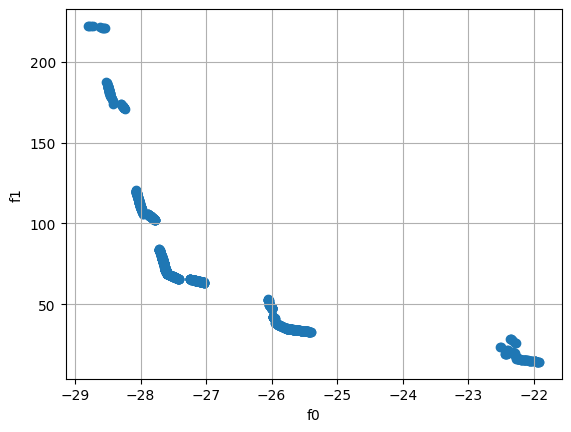

In [17]:
opt.plot_front()

### Run 2

In [18]:
%%time
random.seed(2)
opt.archive_file = "archive2.json"
opt.evolve(fobj)
archive2 = opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------

Items in the solution:

    Component:
        Number of elements: 2
        Sample space: discrete
        Size of population item: 26
        Distinct elements: True
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Weight of 'swap' trial move: 1.0
        Sort values: False
        Maximum step size: 13
    Concentration:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,0.1)
        Selection weight: 4.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.05
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 192.
    Fraction of accepted moves: 0.960000.
    Number of archive updates: 59.
    Fraction of archive updates in accepted moves: 0.307292.
------
TEMPERATURE: 0.900000
    Number of accepted mov

### Output 2

In [19]:
opt.printx()

===
Solutions:
1) {'Component': ['I', 'K'], 'Concentration': 0.009153403844151434}
2) {'Component': ['I', 'K'], 'Concentration': 0.012491036436496863}
3) {'Component': ['I', 'K'], 'Concentration': 0.04307025779688636}
4) {'Component': ['I', 'K'], 'Concentration': 0.003226541729916821}
5) {'Component': ['I', 'K'], 'Concentration': 0.037462878336883595}
6) {'Component': ['I', 'K'], 'Concentration': 0.003582712753839229}
7) {'Component': ['I', 'K'], 'Concentration': 0.00811599531240663}
8) {'Component': ['I', 'K'], 'Concentration': 0.04427419968819298}
9) {'Component': ['I', 'T'], 'Concentration': 0.01962968465618975}
10) {'Component': ['I', 'T'], 'Concentration': 0.029269270231977007}
11) {'Component': ['I', 'T'], 'Concentration': 0.013099357482229346}
12) {'Component': ['Z', 'U'], 'Concentration': 0.09215439834257914}
13) {'Component': ['U', 'Z'], 'Concentration': 0.09215439834257914}
14) {'Component': ['U', 'Z'], 'Concentration': 0.0939983237104495}
15) {'Component': ['U', 'Z'], 'Conce

In [20]:
opt.print_stats()

===
Objective function 0: 
    Minimum: -28.796223
    Maximum: -21.916396
    Average: -27.378331
===
Objective function 1: 
    Minimum: 14.521963
    Maximum: 222.107411
    Average: 85.816628


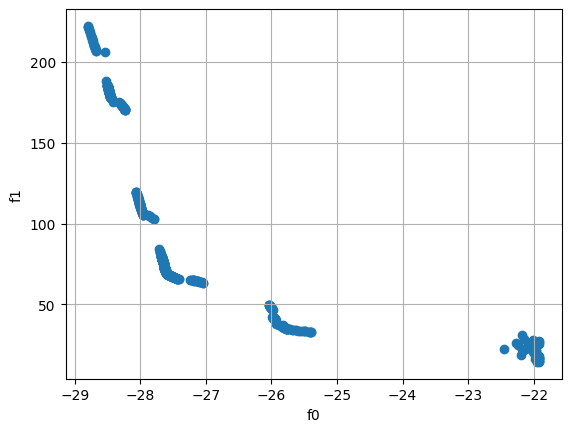

In [21]:
opt.plot_front()

### Run 3

In [22]:
%%time
random.seed(3)
opt.archive_file = "archive3.json"
opt.evolve(fobj)
archive3 = opt.copyx()

--- BEGIN: Evolving a solution ---

Initializing an empty archive...
Done!
------

Items in the solution:

    Component:
        Number of elements: 2
        Sample space: discrete
        Size of population item: 26
        Distinct elements: True
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Weight of 'swap' trial move: 1.0
        Sort values: False
        Maximum step size: 13
    Concentration:
        Number of elements: 1
        Sample space: continuous
        Boundaries: (0.0,0.1)
        Selection weight: 4.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 0.05
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 193.
    Fraction of accepted moves: 0.965000.
    Number of archive updates: 66.
    Fraction of archive updates in accepted moves: 0.341969.
------
TEMPERATURE: 0.900000
    Number of accepted mov

### Output 3

In [23]:
opt.printx()

===
Solutions:
1) {'Component': ['I', 'R'], 'Concentration': 0.09464095571307436}
2) {'Component': ['I', 'R'], 'Concentration': 0.041675282517298434}
3) {'Component': ['I', 'R'], 'Concentration': 0.029639267005350148}
4) {'Component': ['I', 'R'], 'Concentration': 0.07630984689839314}
5) {'Component': ['I', 'R'], 'Concentration': 0.07458803377486675}
6) {'Component': ['I', 'R'], 'Concentration': 0.09040586318589622}
7) {'Component': ['I', 'R'], 'Concentration': 0.0810476019128755}
8) {'Component': ['I', 'R'], 'Concentration': 0.05080448930663206}
9) {'Component': ['I', 'R'], 'Concentration': 0.06506573772114552}
10) {'Component': ['I', 'R'], 'Concentration': 0.02252560437188192}
11) {'Component': ['I', 'R'], 'Concentration': 0.07118868888897936}
12) {'Component': ['R', 'I'], 'Concentration': 0.07118868888897936}
13) {'Component': ['R', 'I'], 'Concentration': 0.015858041466706108}
14) {'Component': ['R', 'I'], 'Concentration': 0.04352435417890779}
15) {'Component': ['R', 'I'], 'Concentra

In [24]:
opt.print_stats()

===
Objective function 0: 
    Minimum: -28.799224
    Maximum: -21.940335
    Average: -27.429906
===
Objective function 1: 
    Minimum: 14.418425
    Maximum: 222.059207
    Average: 85.092183


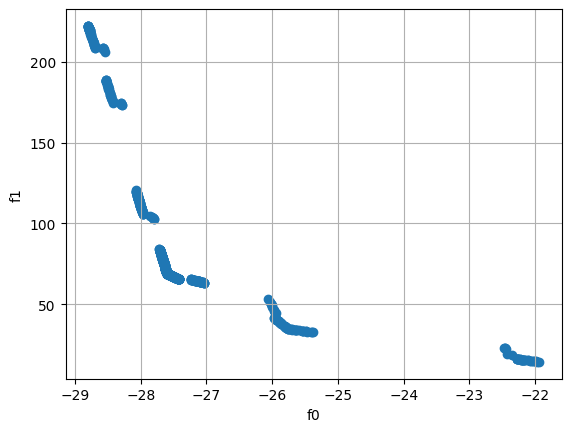

In [25]:
opt.plot_front()

### Merges the three solution archives and removes the dominated solutions from the resulting archive

Merging archives from different runs provides a simple manner of performing parallel runs.

In [26]:
%%time
merged = opt.mergex([archive1, archive2, archive3])
pruned = opt.prune_dominated(xset = merged, del_duplicated = True)
opt.savex(xset = pruned, archive_file = "merged_archive.json")
opt.printx(pruned)

===
Solutions:
1) {'Component': ['I', 'R'], 'Concentration': 0.0766582658338888}
2) {'Component': ['I', 'R'], 'Concentration': 0.06048546667601177}
3) {'Component': ['I', 'R'], 'Concentration': 0.027026223988424303}
4) {'Component': ['I', 'R'], 'Concentration': 0.06727151725550516}
5) {'Component': ['R', 'I'], 'Concentration': 0.06727151725550516}
6) {'Component': ['R', 'I'], 'Concentration': 0.09357423551035386}
7) {'Component': ['R', 'I'], 'Concentration': 0.04952760499798145}
8) {'Component': ['I', 'R'], 'Concentration': 0.04952760499798145}
9) {'Component': ['I', 'R'], 'Concentration': 0.006457953569748855}
10) {'Component': ['I', 'R'], 'Concentration': 0.06039144718983527}
11) {'Component': ['I', 'V'], 'Concentration': 0.08991377521237962}
12) {'Component': ['V', 'I'], 'Concentration': 0.07109367802357107}
13) {'Component': ['V', 'I'], 'Concentration': 0.07687444772056454}
14) {'Component': ['V', 'I'], 'Concentration': 0.0772133316881723}
15) {'Component': ['V', 'I'], 'Concentrati

In [27]:
opt.print_stats(pruned)

===
Objective function 0: 
    Minimum: -28.799224
    Maximum: -21.918532
    Average: -27.315106
===
Objective function 1: 
    Minimum: 14.304351
    Maximum: 222.059207
    Average: 81.345119


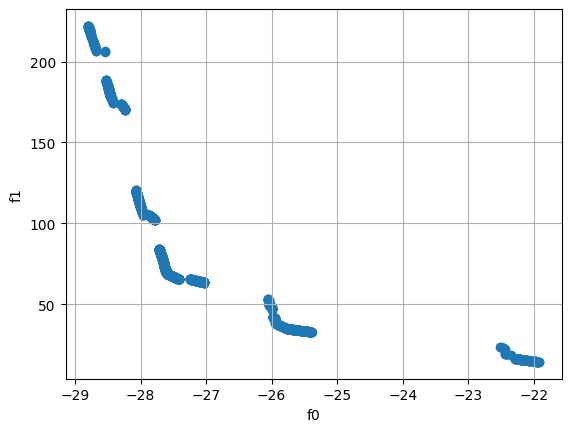

In [28]:
opt.plot_front(pruned)

### Decision making

Many solutions (i.e., candidate alloys) still remain in the archive and it is hard to choose one or two out of them. 

In order to reduce the solution set to something a human being is able to deal with, first, the *trimx* method is 
used to select only the alloys that present a reasonable (according to the users needs) value of the *X* property.

In [29]:
trimmed = opt.trimx(xset = pruned, thresholds = [-25.0, None])
opt.printx(trimmed)

===
Solutions:
1) {'Component': ['R', 'I'], 'Concentration': 0.06727151725550516}
2) {'Component': ['R', 'I'], 'Concentration': 0.09357423551035386}
3) {'Component': ['R', 'I'], 'Concentration': 0.04952760499798145}
4) {'Component': ['V', 'I'], 'Concentration': 0.07109367802357107}
5) {'Component': ['V', 'I'], 'Concentration': 0.07687444772056454}
6) {'Component': ['V', 'I'], 'Concentration': 0.0772133316881723}
7) {'Component': ['V', 'I'], 'Concentration': 0.07930679475423225}
8) {'Component': ['V', 'I'], 'Concentration': 0.0709185733727565}
9) {'Component': ['V', 'I'], 'Concentration': 0.0789991008517654}
10) {'Component': ['V', 'I'], 'Concentration': 0.09746284814954409}
11) {'Component': ['V', 'I'], 'Concentration': 0.09055037660367497}
12) {'Component': ['V', 'I'], 'Concentration': 0.07126226380303001}
13) {'Component': ['V', 'I'], 'Concentration': 0.08837721496633014}
14) {'Component': ['V', 'I'], 'Concentration': 0.09100656157235062}
15) {'Component': ['V', 'I'], 'Concentration'

The next step is to further reduce the number of solutions. Below, we use the *reducex* method to select 10 alloying candidates with the lowest cost, assuming cost is the most important variable for the user.

As can be seen, **R** alloys with more than 9\% **I** added as an alloying element are the optimized alloys considering the user needs.

In [30]:
sol1 = opt.reducex(xset = trimmed, index = 1, nel = 10)
opt.printx(sol1)

===
Solutions:
1) {'Component': ['R', 'I'], 'Concentration': 0.09961251269857901}
2) {'Component': ['R', 'I'], 'Concentration': 0.09637590894243371}
3) {'Component': ['R', 'I'], 'Concentration': 0.09616336914705503}
4) {'Component': ['R', 'I'], 'Concentration': 0.09500995836756573}
5) {'Component': ['R', 'I'], 'Concentration': 0.09457291987623831}
6) {'Component': ['R', 'I'], 'Concentration': 0.09357423551035386}
7) {'Component': ['R', 'I'], 'Concentration': 0.09274606866830873}
8) {'Component': ['R', 'I'], 'Concentration': 0.0914748445931505}
9) {'Component': ['R', 'I'], 'Concentration': 0.09097618730970847}
10) {'Component': ['R', 'I'], 'Concentration': 0.09006533630738398}
Values:
1) [-25.380110490745203, 32.768490351663786]
2) [-25.39255453769409, 32.834875221929366]
3) [-25.393371707601645, 32.83923455282235]
4) [-25.397806324555933, 32.86289176597794]
5) [-25.399486643777657, 32.87185571267446]
6) [-25.40332637087202, 32.89233938539456]
7) [-25.406510494675977, 32.909325631629684

To reduce the number of candidates even further, we use the *reducex* method again, but now to select 5 alloy candidates with the highest value of the *X* property.

In [31]:
sol2 = opt.reducex(xset = sol1, index = 0, nel = 5)
opt.printx(sol2)

===
Solutions:
1) {'Component': ['R', 'I'], 'Concentration': 0.09006533630738398}
2) {'Component': ['R', 'I'], 'Concentration': 0.09097618730970847}
3) {'Component': ['R', 'I'], 'Concentration': 0.0914748445931505}
4) {'Component': ['R', 'I'], 'Concentration': 0.09274606866830873}
5) {'Component': ['R', 'I'], 'Concentration': 0.09357423551035386}
Values:
1) [-25.416817335386213, 32.96430921423811]
2) [-25.413315308727917, 32.94562706153227]
3) [-25.411398078472352, 32.93539927291112]
4) [-25.406510494675977, 32.909325631629684]
5) [-25.40332637087202, 32.89233938539456]
